### 1.) (5 points) Recall that a function of the form  $$f(x) = g(⟨w, x⟩ + b),$$ where g is a function that maps real numbers to class labels is called a linear threshold function (LTF). LTFs can be used to express a wide range of functions, some that are un- expected. For example, if the features of the data vector x are binary (0/1), the function $$f(x) = x_1 OR x_2 OR ...OR x_d$$ can be represented as an LTF:  $$f(x)=Heaviside(x_1 +x_2 +...+x_d −1).$$ Derive LTF representations of the following functions. Assume that data is represented by binary d-dimensional vectors, $x ∈ {0, 1}d$.  
> a. f(x) is a conjunction (AND) of the subset of features indexed by $i_1,...,i_k.$  
> b. $f(x) = MajorityBit(x).$  

a. $f(x) = Heaviside(x_1+x_2+x_3+...+x_d - k -1)$

b. $f(x) = Heaviside(x_1+x_2+...+x_d - d/2)$ if the sum is greater than or equal to d/2 than we know the majority bit is 1, and if it isn't the majority bit is 0.

### 2.) (10points)In class,we discussed how to represent XOR-like functions using quadratic features, since standard perceptrons are insufficient for this task. However, here we show that XOR-type functions can indeed be simulated using multi-layer networks of perceptrons. This example shows a glimpse of the expressive power of “deep neural networks”: merely increasing the depth from 1 to 2 layers can help reproduce highly nonlinear decision boundaries.  
> a. Consider a standard two-bit XOR function,where we have 2-dimensional inputs $x_1,x_2 = ±1$ and output $y = x1(XOR)x2 = −1 if x1=x2,$or $1$ otherwise.  
Geometrically argue why a single perceptron cannot be used to simulate the above function.    
> b. Graphically depict, and write down the equation for, the optimal decision region for the following logical functions:       
(i)x1(AND)(NOT(x2))    
(ii) (NOT(x1))(AND)x2   
(iii) x1(OR)x2   
Make note of the weights learned corresponding to the optimal decision boundary for each function.      
c. Using the above information, simulate a multi-layer perceptron network for the XOR operation with the learned weights from Part (b).  

a. If we plot the truth table for the xor function we get something that looks like the graph below. There is no linear function that can draw a separating line between these points. We would need to use a quadratic function and therefore a single perceptron will not suffice.

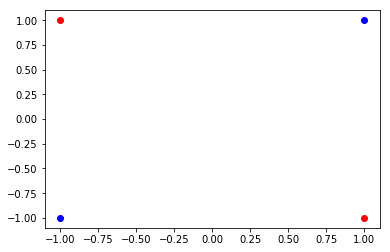

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.plot([1,-1], [1, -1], 'bo', [1,-1,],[-1, 1], 'ro')
plt.show()

In [2]:
from numpy import ones,vstack
from numpy.linalg import lstsq
def find_line(xs, ys):
    points = [xs,ys]
    x_coords, y_coords = zip(*points)
    A = vstack([x_coords,ones(len(x_coords))]).T
    m, c = lstsq(A, y_coords)[0]
    print("Line Solution is y = {m}x + {c}".format(m=m,c=c))

#### b. Graphically depict, and write down the equation for, the optimal decision region for the following logical functions:  
#### (i)x1(AND)(NOT(x2))  
Note: My work for solving the weights, are included as images at the bottom of the notebook.  
We can find the equation of the line by finding the midpoints between (1,1) and (1,-1) which is (1,0), and the midpoints between (-1,-1) and (1,-1) which is (0,-1). We can calculate the equation of the line between these two points as y = 1x -1. 
If we want to find the specific weights of the values that will give us the classific the points we can solve a system of equations to get $label = 1*w_1 + -1*w_2 -1$, if label is greater than 0 we label the point 1, and -1 otherwise.  
x1   x2   x1 and notx2  
1       1    -1   
1       -1   1    
-1      1    -1    
-1      -1   -1    

In [3]:
find_line((1,0),(0,-1))

Line Solution is y = 1.0000000000000002x + -1.0


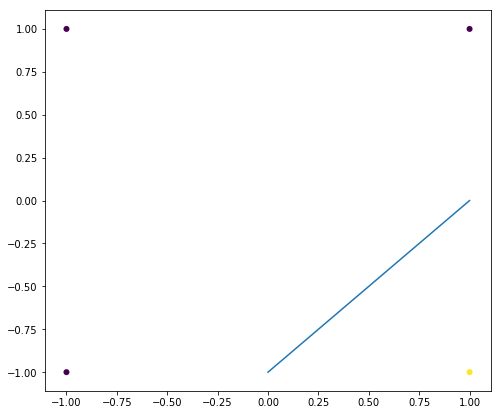

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.array([1,-1,-1,1])
x2 = np.array([1,-1,1,-1])
c = np.array([-1,-1,-1,1])

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

# plot the equation of the line between  (-1,-1),(1,1) and (1,-1)
x_vals = np.linspace(0, 1 ,num=5)
y_vals = np.linspace(-1,0,num=5)

# plot x1,x2 data with c as the color vector, set the line width of the markers to 0
ax.scatter(x1, x2, c=c, lw=0);
ax.plot(x_vals,y_vals,'-')

#### (ii) (NOT(x1))(AND)x2    
We can find the equation of the line by finding the midpoints between (1,1) and (-1,1) which is (0,1), and the midpoints between (-1,-1) and (-1,1) which is (-1,0). We can calculate the equation of the line between these two points as y = 1x + 1. This classify points to the right of the line as -1, and to the left as +1. 
If we want to find the specific weights of the values  we can solve a system of equations to get $label = -1*w_1 + 1*w_2 -1$, if label is greater than 0 we label the point 1, and -1 otherwise.
 
x1   x2   notx1 and x2  
1       1    -1   
1       -1   -1    
-1      1     1    
-1      -1   -1    

In [5]:
find_line((-1,0),(0,1))

Line Solution is y = 1.0000000000000002x + 1.0


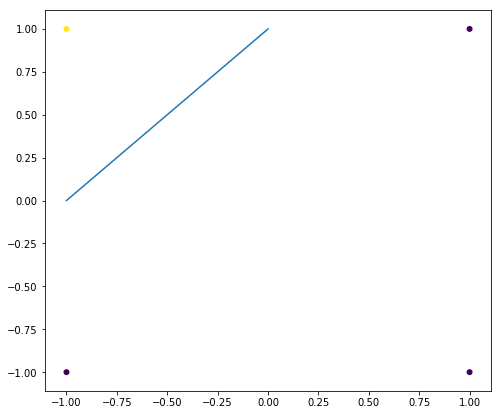

In [6]:
x1 = np.array([1,1,-1,-1])
x2 = np.array([1,-1,1,-1])
c = np.array([-1,-1,1,-1])

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

# plot the equation of the line between  (-1,-1),(1,1) and (1,-1)
x_vals = np.linspace(-1,0,num=5)
y_vals = np.linspace(0,1,num=5)

# plot x1,x2 data with c as the color vector, set the line width of the markers to 0
ax.scatter(x1, x2, c=c, lw=0);
ax.plot(x_vals,y_vals,'-')

#### iii) x1(OR)x2      
We can find the equation of the line by finding the midpoints between (-1,-1) and (1,-1) which is (0,-1), and the midpoints between (-1,-1) and (-1,1) which is (-1,0). We can calculate the equation of the line between these two points as y = -1x - 1. This classify points to the right of the line as -1, and to the left as +1. 
If we want to find the specific weights of the values  we can solve a system of equations to get $label = 1*w_1 + 1*w_2 +1$, if label is greater than 0 we label the point 1, and -1 otherwise.       
   
x1   x2   x1 or x2    
1       1    1     
1       -1   1      
-1      1    1      
-1      -1   -1    

In [7]:
find_line((-1,0),(0,-1))

Line Solution is y = -1.0000000000000002x + -1.0


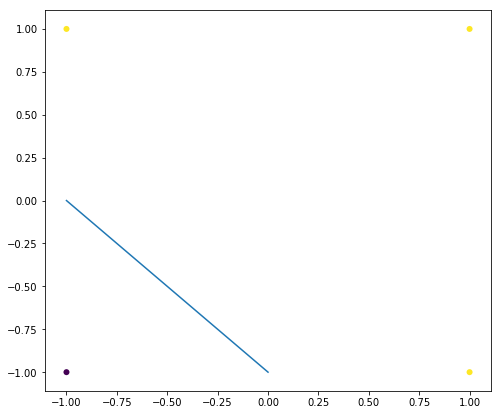

In [8]:
x1 = np.array([1,1,-1,-1])
x2 = np.array([1,-1,1,-1])
c = np.array([1,1,1,-1])

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

# plot the equation of the line between  (-1,-1),(1,1) and (1,-1)
x_vals = np.linspace(0,-1,num=5)
y_vals = np.linspace(-1,0,num=5)

# plot x1,x2 data with c as the color vector, set the line width of the markers to 0
ax.scatter(x1, x2, c=c, lw=0);
ax.plot(x_vals,y_vals,'-')

#### c. Using the above information, simulate a multi-layer perceptron network for the XOR operation with the learned weights from Part (b).

We can combine the functions from 2 and the weights we derived to solve the XOR.   
We have (x1 & !x2) + (!x1 & x2) + !(x1 or x2). We have to not the last x1 or x2 to flip the quadrants. Using our weights we can simulate the model of perceptron algo as shown in the image below. (Ignore the work below the model diagram)

<img src="xor.jpg">

### 3.) (10 points) Suppose we are given real-valued scalar data (i.e., d = 1) belonging to one of two classes. We are given a set of three data samples with negative labels, $X_− = \{0, 1, −1\}$, and a set of three data samples with positive labels, $X_+ = \{−3, 3, −2\}$. Our goal is to build a classifier for this dataset. We will show that kernel methods are particularly useful in this case.  
> a. Argue that no perfect linear separator in the original space can exist.  
> b. Argue that if the data is mapped via the two-dimensional feature mapping $φ(u)=(u,u2)$, then a perfect linear separator exists.  
> c. Given two (scalar) data points $x_1$ and $x_2$, write down the explicit form of the kernel inner product for this new feature space in terms of $x_1$ and $x_2$.  
> d. Explicitly calculate the maximum-margin separating hyperplane in the kernel feature space. (It should be a straight line since the feature space is two-dimensional; provide the equation for this line.) Calculate the value of its margin. Use the mapping $φ$ to plot the data points in the new feature space. Draw the separating hyperplane, and mark the closest points nearest to the hyperplane.

#### a. Argue that no perfect linear separator in the original space can exist.  
Plotting the data on a number line we can see that there is no vertical line to be drawn that can separate the two classes. 

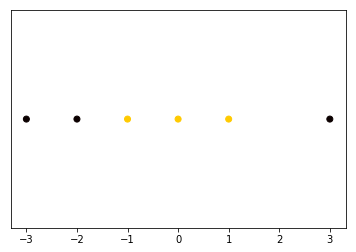

In [9]:
predictedY =[0,1,-1,-3,3,-2] 
UnlabelledY=[-1,-1,-1,1,1,1]

plt.scatter(predictedY, np.zeros_like(predictedY), 
            c=UnlabelledY, cmap="hot_r", vmin=-2)

plt.yticks([])
plt.show()

#### b. Argue that if the data is mapped via the two-dimensional feature mapping  φ(u)=(u,u2)φ(u)=(u,u2) , then a perfect linear separator exists.   
[0,1,-1,-3,3,-2]   
$\phi(0) = (0,0)$, $\phi(1) = (1,1)$, $\phi(-1) = (-1,1)$, $\phi(-3) = (-3,9)$, $\phi(3) = (3,9)$,$\phi(-2) = (-2,4)$  
Given the mapping function, any u with an absolute value less than or equal to 1, will have a u^2 no greater than or equa1 to 1. Any u with an absolute value greater than 1 will then be no less than 1 for it's u^2. Thus there is a clear boundary between the 2 classes if we think about it mathematically.  
If we plot the data, we can also see a clear linear decision boundary between the two classes. 

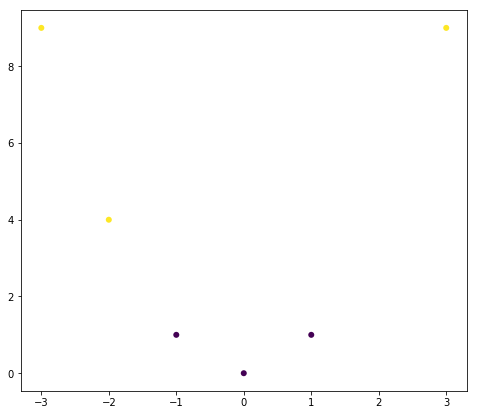

In [10]:
x1 = np.array([0,1,-1,-3,3,-2])
x2 = np.array([0,1,1,9,9,4])
c = np.array([-1,-1,-1,1,1,1])

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
# plot x1,x2 data with c as the color vector, set the line width of the markers to 0
ax.scatter(x1, x2, c=c, lw=0);

#### c. Given two (scalar) data points  x1  and  x2 , write down the explicit form of the kernel inner product for this new feature space in terms of  x1 and  x2    

$K(x_{1},x_{2}) = <\phi(x_{1}),\phi(x_{2})>$ = $x_{1}x_{2} + x_{1}^2x_{2}^2$

#### d. Explicitly calculate the maximum-margin separating hyperplane in the kernel feature space. (It should be a straight line since the feature space is two-dimensional; provide the equation for this line.) Calculate the value of its margin. Use the mapping  φ  to plot the data points in the new feature space. Draw the separating hyperplane, and mark the closest points nearest to the hyperplane.  
If we use (-1,1) and (-2,4) as our support vectors we can calculate the midpoint between them as (-1.5,2.5) = ((-1 + -2)/2, (1 + 4)/2). I didn't know how to mark them on matplotlib but (-1,1) and (-2,4) are the two closest points.
The line going through the midpoint and (-2,4) and (-1,1) is the line perpendicular to the separating line at the midpoint between (-2,4) and (-1,1). The equation of the line perpendicular to the separating line between the two points is y = (1/3)x+3.  We can then find the line perpendicular to this line to find the final separating line.   
2.5 = -3(-1.5) + b  
b = -2   
The equation of the separating line is y = -3x - 2.   
We can also solve a system of equations to the weights which would be written as $x_1*-.5 +.5*x_2 -2 = label$  The work for the weights is in the perceptron model image above.  

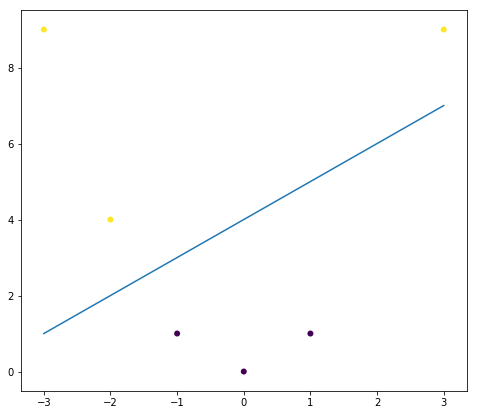

In [11]:
x1 = np.array([0,1,-1,-3,3,-2])
x2 = np.array([0,1,1,9,9,4])
c = np.array([-1,-1,-1,1,1,1])

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

x_vals = np.array([-3,-2,-1,0,1,2,3])
y_vals = np.array([1,2,3,4,5,6,7])
    
# plot x1,x2 data with c as the color vector, set the line width of the markers to 0
ax.plot(x_vals,y_vals,'-')
ax.scatter(x1, x2, c=c, lw=0);

### 4.) (10 points) Assuming a classification application with n data points in d dimensions where n = d = 1010, rank the following algorithms in decreasing order of (i) training times; (ii) testing times. Explicitly state these running times in terms of n and d.  
> a. Perceptron.  
> b. Nearest neighbors.  
> c. Kernel perceptron with a polynomial kernel of order 4    
> d. Kernel perceptron with gaussian kernel.  
> e. Linear support vector machines.  

SVM had the highest training runtime with min(O(nd^2),O(n^2d)). The others all had a similar training time with O(nd). K-NN has the highest testing runtime at O(nd), but the rest all had similar testing runtimes of O(d).

a. Perceptron. 

The training time of the perceptron algorithm is O(nd). To test for a single point we compute the sign inner product of the point with the weight vectors which will give us the class label. This is O(d) for a single point. For training, because we have n points then the total is O(nd).

b. Nearest neighbors

Training and testing are both O(nd) --> O(1010*1010) for each query. Each distance computation takes O(d) and there are n points. The training and testing times are the same because even during testing we have to compute the distances between all points to output a predicted label. 

c. Kernel perceptron with a polynomial kernel of order 4   

The running time of the polynomial kernel perceptron is similar to regular perceptron which is O(nd).  The kernel inner product can still be computing using O(d) operations. Therefore, training is O(nd) for n points and testing is O(d) for testing a single point. 

d. Kernel perceptron with gaussian kernel

The running time of the gaussian kernel perceptron is the same as regular perceptron and polynomial kernal perceptron which is O(nd).  The kernel inner product can be computing using O(d) operations. Therefore, training is O(nd) for n points and testing is O(d) for testing a single point. 

e. Linear support vector machines

Training is min(O(nd^2),O(n^2d)) and depends on what we are maximizing and minimizing over when we solve the QP problem. Testing a point is O(d) because we just need to plug in the points values and check which side of the line it is on and this just requires iterating over the features of that single point. 

### 5.) (15 points) We are given a sample of Italian wine. We can narrow its origin down to one of 3 possible regions – Veneto, Tuscany, and Piedmont – but no further. Fortunately, (i) we have several sample wines from these regions, and (ii) we know how to build a classifier from samples. This problem details how to build such a wine classification method.  
> a. Download the data from http://archive.ics.uci.edu/ml/datasets/Wine. Go through the ReadMe file carefully for instructions.  
> b. Randomly choose all but 5 samples from each class as the training data points. Test the performance of a k-NN classifier with k = 1. Record how many data points (out of 15) were wrongly classified. Repeat this random choice several times to calculate the probability of error.  
> c. How does your above answer change if k increases? Plot/tabulate the probability of error as a function of k (up to k = 9).  
> d. Staring at the data a bit, we realize that the “scale” of the numbers is a bit strange (some feature values are much larger than others.) To fix this, we compute the mean $μ$ and
standard deviation $σ$ of each feature, and normalize each observation $x$ as $(x−μ)/σ$. Repeat the above NN classification with the transformed data, and show that your classification performance improves. (Such a transformation is called a z-score in statistics.)  

In [12]:
import pandas as pd
import random
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

#### a. Download the data from http://archive.ics.uci.edu/ml/datasets/Wine. Go through the ReadMe file carefully for instructions.

In [13]:
df = pd.read_csv("data.txt", sep=",", header=None, names=["Class","Alcohol","Malic acid"
 ,"Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids", "Nonflavanoid phenols",
"Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])
names = ["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids", "Nonflavanoid phenols",
    "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]

#### b. Randomly choose all but 5 samples from each class as the training data points. Test the performance of a k-NN classifier with k = 1. Record how many data points (out of 15) were wrongly classified. Repeat this random choice several times to calculate the probability of error.

In [14]:
#Randomly choose all but 5 rows from each class
#class 1 59 class 2 71 class 3 48
df_1 = df[df.Class == 1]
df_2 = df[df.Class == 2]
df_3 = df[df.Class == 3]
df_1.reset_index(drop=True)
df_2.reset_index(drop=True)
df_3.reset_index(drop=True)
accuracy_scores = []
incorrect_counts = []

In [15]:
def run_simulation(k):
    accuracy_scores = []
    incorrect_counts = []
    for i in range(50):
        rows_1 = random.sample(range(0, 59), 54)
        rows_2 = random.sample(range(0, 71), 66)
        rows_3 = random.sample(range(0, 48), 43)
        test_rows_1 = [x for x in range(59) if x not in rows_1]
        test_rows_2 = [x for x in range(59) if x not in rows_2]
        test_rows_3 = [x for x in range(59) if x not in rows_3]

        test_df1 = df_1.iloc[test_rows_1]
        test_df2 = df_1.iloc[test_rows_2]
        test_df3 = df_1.iloc[test_rows_3]
        train_df1 = df_1.iloc[rows_1].astype(np.float)
        train_df2 = df_2.iloc[rows_2].astype(np.float)
        train_df3 = df_3.iloc[rows_3].astype(np.float)
        temp = [train_df1, train_df2, train_df3]
        train_df = pd.concat(temp)
        temp2 = [test_df1, test_df2, test_df3]
        test_df = pd.concat(temp2)

        x_train = train_df[names].astype(np.float)
        x_train = x_train.as_matrix().astype(np.float)
        y_train = train_df["Class"].astype(np.float)
        y_train = y_train.as_matrix().astype(np.float)

        x_test = test_df[names].astype(np.float)
        x_test = x_test.as_matrix().astype(np.float)
        y_test = test_df["Class"].astype(np.float)
        y_test = y_test.as_matrix().astype(np.float)
        
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        df_count = pd.DataFrame(x_test)
        df_count["actual"] = y_test
        df_count["predicted"] = y_pred

        incorrect = df_count[df_count["actual"] != df_count["predicted"]]
        incorrect_counts.append(len(incorrect.index))
        accuracy_scores.append(1-metrics.accuracy_score(y_test, y_pred))
    return sum(accuracy_scores)/len(accuracy_scores), sum(incorrect_counts)/len(incorrect_counts)

In [16]:
mean_misblah, avg_inc = run_simulation(1)
print ("Average misclassification: ", mean_misblah, "Average incorrect counts: ", avg_inc)

Average misclassification:  0.0295772575251 Average incorrect counts:  0.74


c. How does your above answer change if k increases? Plot/tabulate the probability of error as a function of k (up to k = 9).

In [17]:
a_scores = []
inc_scores = []
for i in range(1,11):
    acc, inc = run_simulation(i)
    a_scores.append(acc)
    inc_scores.append(inc)

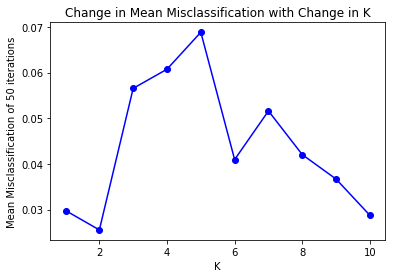

In [18]:
plt.plot([x for x in range(1,11)], a_scores, 'bo-')  
plt.title("Change in Mean Misclassification with Change in K")
plt.xlabel('K')
plt.ylabel('Mean Misclassification of 50 iterations')
plt.show()

The change in mean misclassification initially goes up until k =4, but then drops overall in a jerky fashion as k approaches 9. It then increases slightly at k = 10.

#### d. Staring at the data a bit, we realize that the “scale” of the numbers is a bit strange (some feature values are much larger than others.) To fix this, we compute the mean  μ  and standard deviation  σ  of each feature, and normalize each observation  x  as  (x−μ)/σ. Repeat the above NN classification with the transformed data, and show that your classification performance improves. (Such a transformation is called a z-score in statistics.)

In [19]:
def run_scaled_simulation(k):
    accuracy_scores = []
    incorrect_counts = []
    for i in range(50):
        rows_1 = random.sample(range(0, 59), 54)
        rows_2 = random.sample(range(0, 71), 66)
        rows_3 = random.sample(range(0, 48), 43)
        test_rows_1 = [x for x in range(59) if x not in rows_1]
        test_rows_2 = [x for x in range(59) if x not in rows_2]
        test_rows_3 = [x for x in range(59) if x not in rows_3]

        test_df1 = df_1.iloc[test_rows_1]
        test_df2 = df_1.iloc[test_rows_2]
        test_df3 = df_1.iloc[test_rows_3]
        train_df1 = df_1.iloc[rows_1].astype(np.float)
        train_df2 = df_2.iloc[rows_2].astype(np.float)
        train_df3 = df_3.iloc[rows_3].astype(np.float)
        temp = [train_df1, train_df2, train_df3]
        train_df = pd.concat(temp)
        temp2 = [test_df1, test_df2, test_df3]
        test_df = pd.concat(temp2)

        x_train = train_df[names].astype(np.float)
        x_train = StandardScaler().fit_transform(x_train)
        x_train = x_train.as_matrix().astype(np.float)
        y_train = train_df["Class"].astype(np.float)
        y_train = y_train.as_matrix().astype(np.float)

        x_test = test_df[names].astype(np.float)
        x_test = StandardScaler().fit_transform(x_test)
        x_test = x_test.as_matrix().astype(np.float)
        y_test = test_df["Class"].astype(np.float)
        y_test = y_test.as_matrix().astype(np.float)
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        df_count = pd.DataFrame(x_test)
        df_count["actual"] = y_test
        df_count["predicted"] = y_pred

        incorrect = df_count[df_count["actual"] != df_count["predicted"]]
        incorrect_counts.append(len(incorrect.index))
        accuracy_scores.append(1-metrics.accuracy_score(y_test, y_pred))
    return sum(accuracy_scores)/len(accuracy_scores), sum(incorrect_counts)/len(incorrect_counts)

In [20]:
a_scores = []
inc_scores = []
for i in range(1,11):
    acc, inc = run_simulation(i)
    a_scores.append(acc)
    inc_scores.append(inc)

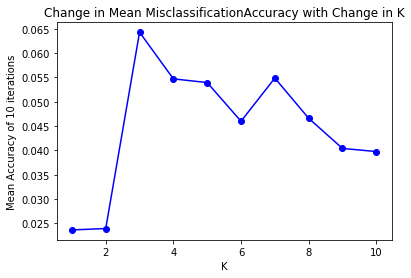

In [21]:
plt.plot([x for x in range(1,11)], a_scores, 'bo-')  
plt.title("Change in Mean MisclassificationAccuracy with Change in K")
plt.xlabel('K')
plt.ylabel('Mean Accuracy of 10 iterations')
plt.show()

The overall shape of the plot is similar to before scaling the data. Without scaling there is more variation in the misclassification rate between k = 3->10. Scaling the data is probably a good idea for working with data in the future.

### 6.) (10 points) In this problem, we will implement the Perceptron algorithm on synthetic training data.  
> a. Suppose that the data dimension d equals 2. Generate two classes of data points with 100 points each, by sampling from Gaussian distributions centered at (0.5, 0.5) and (−0.5, −0.5). Choose the variance of the Gaussian to be small enough so that the data points are sufficiently well separated. Plot the data points on the 2D plane to confirm that this is the case.  
> b. Implement the Perceptron algorithm as discussed in class. Choose the initial weights to be zero and the maximum number of epochs as T = 100, and the learning rate α = 1. How quickly does your implementation converge?  
> c. Now, repeat the above experiment with a second synthetic dataset; this time, increase the variance of the Gaussians such that the generated data points from different classes now overlap. What happens to the behavior of the algorithm? Does it converge? Show that classification regions obtained at the end of T epochs.  

#### a. Suppose that the data dimension d equals 2. Generate two classes of data points with 100 points each, by sampling from Gaussian distributions centered at (0.5, 0.5) and (−0.5, −0.5). Choose the variance of the Gaussian to be small enough so that the data points are sufficiently well separated. Plot the data points on the 2D plane to confirm that this is the case.

In [22]:
arr = (np.random.randn(100, 2) / 10) + 0.5
arr2 = (np.random.randn(100, 2) / 10) - 0.5
x,y = arr.T
at = np.hstack((arr, np.ones((100,1))))
at = np.hstack((at, np.ones((100,1))))
temp = np.ones((100,1)) 
temp = temp * -1
arr2 = np.hstack((arr2, np.ones((100,1))))
at2 = np.hstack((arr2, temp))
train = np.vstack([at, at2])

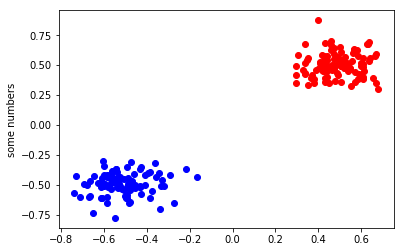

In [23]:
plt.plot(arr[:,0], arr[:,1],'ro', arr2[:,0], arr2[:,1],'bo')
plt.ylabel('some numbers')
plt.show()

#### b. Implement the Perceptron algorithm as discussed in class. Choose the initial weights to be zero and the maximum number of epochs as T = 100, and the learning rate α = 1. How quickly does your implementation converge? 
My algorithm takes 2 iterations before it returns the weight values, so it converges quickly.

In [24]:
def perceptron(X, Y, epochs):
    #initialize weights, t, and alpha
    w = np.zeros(len(X[0]))
    w_old = np.zeros(len(X[0]))
    eta = 1
    t = 0
    
    # loop once because w will equal w_old in the first if condition check
    for i, x in enumerate(X):
        if (np.sign(np.dot(X[i], w)) != Y[i]):
            w = w + eta*X[i]*Y[i]
    t = t + 1

    #keep iterating for number of epochs
    while (t < epochs): 
        #check to see if there has been a change in w_t (the old weights)
        if (np.array_equal(w, w_old)):
            break
        else:
            w_old = w
            #print("updating w")
            #iterate through all the is to update the weights
            for i, x in enumerate(X):
                if (np.sign(np.dot(X[i], w)) != Y[i]):
                    w = w + eta*X[i]*Y[i]
            t = t + 1
    return w, t

In [25]:
#the third column is the bias term
weights, iters = perceptron(train[:,:3],train[:,3], 100)
print(weights)
print(iters)

[ 0.78353761  0.92917949  0.        ]
2


In [26]:
#calculate training accuracy
shizz = train[:,:3]
pred = np.zeros((200,1))
for i in range(200):
    pred[i] = np.sign(np.dot(shizz[i], weights))
print(np.mean(pred == train[:,3].reshape((200,1))))

1.0


Plugging in our weights we can plot the separating line from our algorithm and see that it does a good job separating the two clusters.

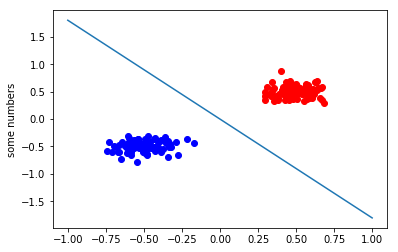

In [27]:
x_vals = np.array([1,0,-1])
y_vals = np.array([-1.80457,0, 1.80457])
plt.plot(arr[:,0], arr[:,1],'ro', arr2[:,0], arr2[:,1],'bo',x_vals,y_vals, '-')
plt.ylabel('some numbers')
plt.show()

#### c. Now, repeat the above experiment with a second synthetic dataset; this time, increase the variance of the Gaussians such that the generated data points from different classes now overlap. What happens to the behavior of the algorithm? Does it converge? Show that classification regions obtained at the end of T epochs.  
With overlapping data, the algorithm doesn't converge within 100 iterations. This makes sense as there is no linear line that could separate the data perfectly. We can plot the line using the weights that have been output and see the decision boundary isn't perfect but gets the general area where a line could be drawn.

In [28]:
arr_var = (np.random.randn(100, 2) / 2) + 0.5
arr2_var = (np.random.randn(100, 2) / 2) - 0.5
at_var = np.hstack((arr_var, np.ones((100,1))))
at_var = np.hstack((at_var, np.ones((100,1))))
temp_var = np.ones((100,1)) 
temp_var = temp_var * -1
arr2_var = np.hstack((arr2_var, np.ones((100,1))))
at2_var = np.hstack((arr2_var, temp_var))
train_var = np.vstack([at_var, at2_var])

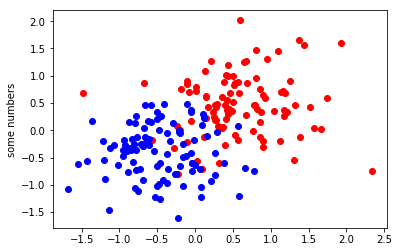

In [29]:
plt.plot(arr_var[:,0], arr_var[:,1],'ro', arr2_var[:,0], arr2_var[:,1],'bo')
plt.ylabel('some numbers')
plt.show()

In [30]:
weights2, iters2 = perceptron(train_var[:,:3],train_var[:,3], 100)
print(weights2)
print(iters2)

[ 1.25421423  1.82198927 -1.        ]
100


In [32]:
shizz = train_var[:,:3]
pred = np.zeros((200,1))
for i in range(200):
    pred[i] = np.sign(np.dot(shizz[i], weights2))
np.mean(pred == train_var[:,3].reshape((200,1)))

0.83499999999999996

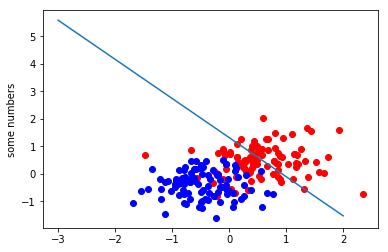

In [33]:
x_vals = np.array([2,1,0,-1,-2,-3])
y_vals = np.array([-1.53187,-0.108959,1.31395,2.73687,4.15978, 5.58269])
plt.plot(arr_var[:,0], arr_var[:,1],'ro', arr2_var[:,0], arr2_var[:,1],'bo', x_vals, y_vals, '-')
plt.ylabel('some numbers')
plt.show()

<img src="1.jpg">

<img src="2.jpg">

<img src="3.jpg">